# Scaling, Re-sizing, Interpolations and Cropping

In this kernel we're gonna learn:
1. How to re-size and scale images 
2. Image Pyramids
3. Cropping

## Resizing 

We could resize images by using `cv2.resize()`
function. 

`cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)`

If dsize parameter is None then the output image is calculated as a function of scaling, using x & y scale.

> List of Interpolation Methods: 
* cv2.INTER_AREA - Good for shrinking or down sampling
* cv2.INTER_NEAREST - Fastest
* cv2.INTER_LINEAR - Good for zooming or up sampling (default)
* cv2.INTER_CUBIC - Better
* cv2.INTER_LANCZOS4 - Best

In [1]:
# Import dependencies 
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the imshow function 
def imshow(image, title = '', size = 6):
  w, h = image.shape[0], image.shape[1]
  aspectRatio = w / h
  plt.figure(figsize = (size * aspectRatio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title);

In [3]:
# Download and unzip images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-08-25 10:25:11--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.148.166
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.148.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  13.8MB/s    in 2.0s    

2022-08-25 10:25:14 (13.8 MB/s) - ‘images.zip’ saved [29586716/29586716]



## Types of re-scaling Methods in OpenCV

* **INTER_NEAREST** - a nearest-neighbor interpolation
* **INTER_LINEAR** - a bilinear interpolation (default)
* **INTER_AREA** - resampling using pixel area relation. It may be a preferred methor for image decimation, as it gives moire-free results. But when the image iz zoomed, it's similar to the **INTER_NEAREST** method.
* **INTER_CUBIC** - a bicubic interpolation over 4x4 pixel neighborhood
* **INTER_LANCZOS4** - a Lanczos interpolation over 8x8 pixel neighborhood

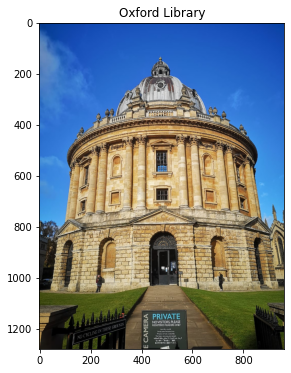

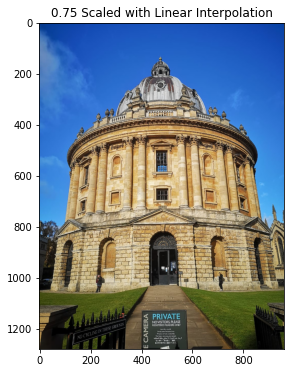

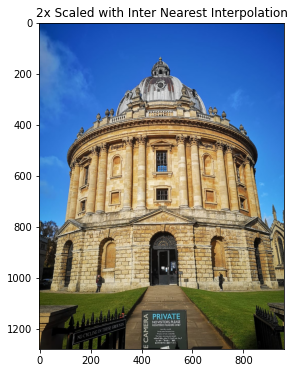

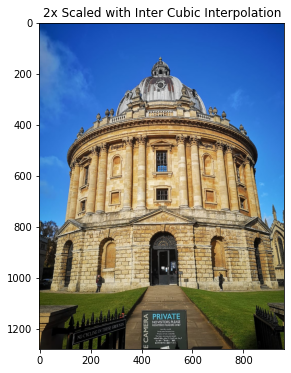

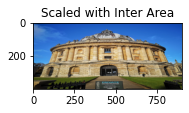

In [4]:
# Load an image and show it using our imshow function
image = cv2.imread('images/oxfordlibrary.jpeg')
imshow(image, title = 'Oxford Library')

# Let's make our image 3/4 of it's original size
scaled_image = cv2.resize(image, None, fx = 0.75, fy = 0.75)
imshow(image, title = '0.75 Scaled with Linear Interpolation')

# Double the size of our image
doubled_image = cv2.resize(image, None, fx = 2, fy = 2, interpolation = cv2.INTER_NEAREST)
imshow(image, title = '2x Scaled with Inter Nearest Interpolation') 

# Double the size again but this time with INTER_CUBIC interpolation
doubled_image_inter_cubic = cv2.resize(image, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
imshow(image, title = '2x Scaled with Inter Cubic Interpolation')

# Lastly, let's skew the re-sizing by setting exact dimensions
scaled_image2 = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
imshow(scaled_image2, 'Scaled with Inter Area')

## Image Pyramids

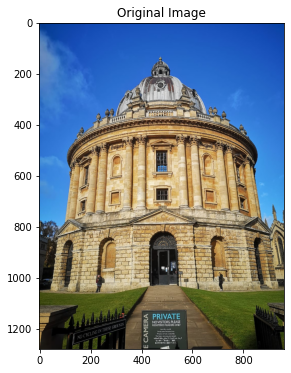

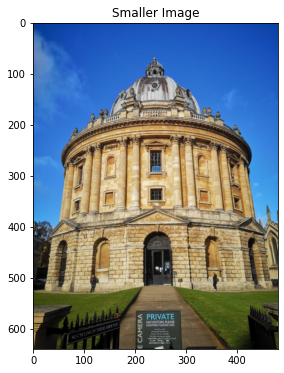

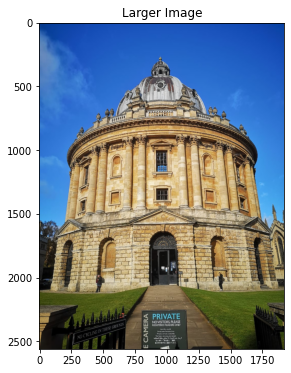

In [5]:
# Reload our image
image = cv2.imread('images/oxfordlibrary.jpeg')

# Make our image smaller
smaller_image = cv2.pyrDown(image)

# Make it Larger
larger_image = cv2.pyrUp(image)

# Show images 
imshow(image, 'Original Image')
imshow(smaller_image, 'Smaller Image')
imshow(larger_image, 'Larger Image');

## Cropping

Cropping is a extremely useful technique in Computer Vision. Specially with Object Detectors.

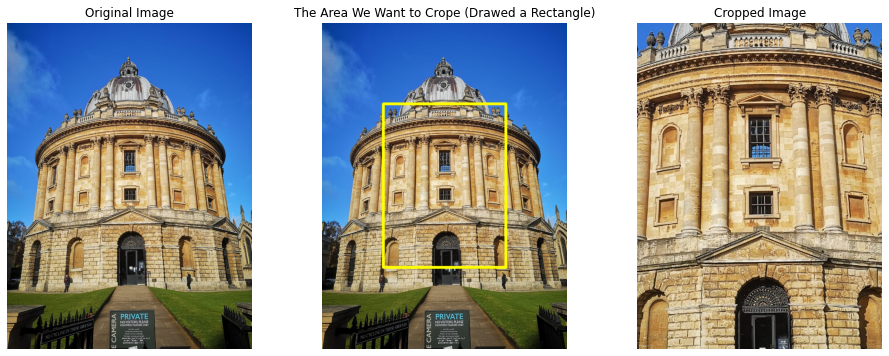

In [6]:
# Load our image 
image = cv2.imread('images/oxfordlibrary.jpeg')

# Get the dimensions of our image
height, width = image.shape[:2]

# Get the starting pixel coordinates (top left of cropping rectangle) using 0.25 to get the x, y position that is 1/4 down from the top left (0,0)
start_row, start_col = int(height * 0.25), int(width * 0.25)

# Get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * 0.75), int(width * 0.75)

# Copy the image and draw a rectangle on it (the reason why are we copying it is, drawing on it is a in-place operation)
copied_image = image.copy()
cv2.rectangle(copied_image, (start_col, start_row), (end_col, end_row), (0, 255, 255), 10)

# Use indexing to crop out the rectangle we desired
cropped_image = image[start_row:end_row, start_col:end_col]

# Plot our original image
plt.figure(figsize = (16, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Plot the area we want to crope
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(copied_image, cv2.COLOR_BGR2RGB))
plt.title('The Area We Want to Crope (Drawed a Rectangle)')
plt.axis('off')

# Plot our cropped image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off');